In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
card_data = pd.read_csv('creditcard.csv\creditcard.csv')
print(card_data.shape)
X = card_data.iloc[:, :-1]
Y = card_data.iloc[:, -1]

(284807, 31)


## Data Preprocessing

In [3]:
#Split dataset into test train and valid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25, random_state = 5)

In [4]:
ct = ColumnTransformer([
        ('std', StandardScaler(), ['Amount', 'Time'])
    ], remainder='passthrough')
x_train = ct.fit_transform(x_train)
x_test = ct.transform(x_test)

In [5]:
weight_nf = y_train.value_counts()[0] / len(y_train)
weight_f = y_train.value_counts()[1] / len(y_train)
print(f"Non-Fraud weight: {weight_nf}")
print(f"Fraud weight: {weight_f}")

Non-Fraud weight: 0.9982725123475574
Fraud weight: 0.0017274876524425926


In [6]:
print(f"Train Data shape: {x_train.shape} Train Class Data shape: {y_train.shape}")
print(f"Test Data shape: {x_test.shape} Test Class Data shape: {y_test.shape}")

Train Data shape: (213605, 30) Train Class Data shape: (213605,)
Test Data shape: (71202, 30) Test Class Data shape: (71202,)


## Artificial Neural Network

In [7]:
ann = tf.keras.models.Sequential()

In [8]:
ann.add(tf.keras.layers.Dense(units = 31, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 15, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

In [9]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
loss = ann.fit(x_train, y_train, batch_size = 32, epochs = 11, validation_split = 0.3)

Epoch 1/11
4673/4673 [==============================] - 3s 550us/step - loss: 0.0071 - accuracy: 0.9992 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 2/11
4673/4673 [==============================] - 2s 522us/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 3/11
4673/4673 [==============================] - 2s 518us/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0038 - val_accuracy: 0.9993
Epoch 4/11
4673/4673 [==============================] - 2s 518us/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 5/11
4673/4673 [==============================] - 2s 521us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/11
4673/4673 [==============================] - 2s 503us/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 7/11
4673/4673 [==============================] - 2s 502us/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0038 -

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, matthews_corrcoef


def print_classification_result(true, predict):
    print(f"Accuracy Score: {accuracy_score(true, predict) * 100:.2f}%")
    print(f"Confusion Matrix: \n {confusion_matrix(true, predict)}\n")
    print(f"MCC_Score:{matthews_corrcoef(true, predict)}\n")
    print(f"f1_score: \n {f1_score(true, predict)}\n")
    print(f"recall_score: \n {recall_score(true, predict)}\n")
    print(f"Precision_Score:{precision_score(true, predict)}")

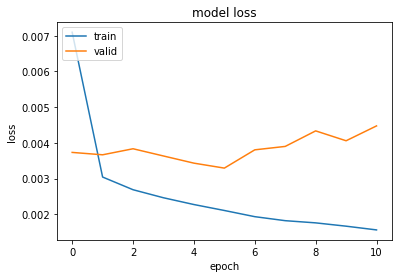

In [12]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [13]:
y_pred = ann.predict(x_test)
y_pred = np.round(y_pred)

In [14]:
print_classification_result(y_test, y_pred)

Accuracy Score: 99.95%
Confusion Matrix: 
 [[71071     8]
 [   30    93]]

MCC_Score:0.8341378979624028

f1_score: 
 0.8303571428571429

recall_score: 
 0.7560975609756098

Precision_Score:0.9207920792079208


## Parameter testing

In [8]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 31, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 20, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
loss = ann.fit(x_train, y_train, batch_size = 32, epochs = 11, validation_split = 0.3)

Epoch 1/11
4673/4673 [==============================] - 3s 557us/step - loss: 0.0103 - accuracy: 0.9983 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 2/11
4673/4673 [==============================] - 2s 520us/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 3/11
4673/4673 [==============================] - 3s 543us/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 4/11
4673/4673 [==============================] - 3s 545us/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 5/11
4673/4673 [==============================] - 3s 540us/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 6/11
4673/4673 [==============================] - 2s 516us/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 7/11
4673/4673 [==============================] - 2s 523us/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0037 -

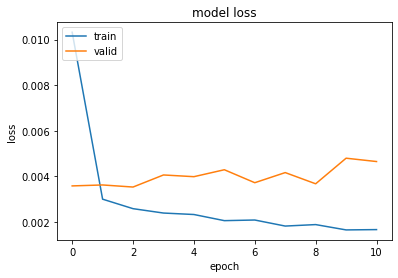

In [10]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [11]:
y_pred = ann.predict(x_test)
y_pred = np.round(y_pred)

In [12]:
print_classification_result(y_test, y_pred)

Accuracy Score: 99.93%
Confusion Matrix: 
 [[71070     9]
 [   39    84]]

MCC_Score:0.7850785219302885

f1_score: 
 0.7777777777777778

recall_score: 
 0.6829268292682927

Precision_Score:0.9032258064516129


In [13]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 31, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 10, activation = "relu"))
ann.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
loss = ann.fit(x_train, y_train, batch_size = 32, epochs = 11, validation_split = 0.3)

Epoch 1/11
4673/4673 [==============================] - 3s 549us/step - loss: 0.0090 - accuracy: 0.9990 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 2/11
4673/4673 [==============================] - 3s 550us/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 3/11
4673/4673 [==============================] - 2s 512us/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0040 - val_accuracy: 0.9992
Epoch 4/11
4673/4673 [==============================] - 2s 513us/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 5/11
4673/4673 [==============================] - 2s 534us/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 6/11
4673/4673 [==============================] - 2s 523us/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 7/11
4673/4673 [==============================] - 2s 504us/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0043 -

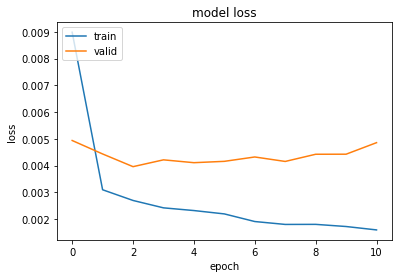

In [15]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [17]:
y_pred = ann.predict(x_test)
y_pred = np.round(y_pred)

In [18]:
print_classification_result(y_test, y_pred)

Accuracy Score: 99.94%
Confusion Matrix: 
 [[71064    15]
 [   29    94]]

MCC_Score:0.8115202118224439

f1_score: 
 0.8103448275862069

recall_score: 
 0.7642276422764228

Precision_Score:0.8623853211009175
